In [1]:
!pip install numpy pandas matplotlib scikit-learn tensorflow keras opencv-python 


In [14]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

In [15]:
CAMINHO_IMAGENS = "/home/gustavson-barros/Área de trabalho/ProjetoDeExtensao/dataset/archive/ham10000_images_part_1"

CAMINHO_CSV = "/home/gustavson-barros/Área de trabalho/ProjetoDeExtensao/dataset/archive/HAM10000_metadata.csv"

df = pd.read_csv(CAMINHO_CSV)
df = df[:1000]  # apenas 100 para testar

IMG_SIZE = 128



In [16]:
imagens = []
labels = []

for index, row in df.iterrows():
    nome_arquivo = row["image_id"] + ".jpg"
    classe = row["dx"]  

    caminho_completo = os.path.join(CAMINHO_IMAGENS, nome_arquivo)
    
    
    if os.path.exists(caminho_completo):
        img = cv2.imread(caminho_completo)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        imagens.append(img)
        labels.append(classe)


X = np.array(imagens) / 255.0  
y = np.array(labels)

le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_categ = to_categorical(y_encoded)

In [52]:
#treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y_categ, test_size=0.2, random_state=42)

In [53]:
# Criação da CNN simples

modelo = Sequential()
modelo.add(Input(shape=(IMG_SIZE, IMG_SIZE, 3)))  
modelo.add(Conv2D(32, (3, 3), activation='relu'))
modelo.add(MaxPooling2D((2, 2)))
modelo.add(Flatten())
modelo.add(Dense(64, activation='relu'))
modelo.add(Dense(y_categ.shape[1], activation='softmax'))


In [54]:
modelo.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [55]:
hist = modelo.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 294ms/step - accuracy: 0.8590 - loss: 0.9398 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 221ms/step - accuracy: 0.9978 - loss: 0.8563 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 236ms/step - accuracy: 0.9961 - loss: 1.2163 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 241ms/step - accuracy: 0.9988 - loss: 0.2291 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 226ms/step - accuracy: 0.9988 - loss: 0.1554 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 251ms/step - accuracy: 0.9949 - loss: 0.4864 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 230ms/step - accuracy: 0.9978 - loss: 0.0942 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 225ms/step - accuracy: 0.9993 - los

In [12]:
def prever_imagem(caminho_img):
    img = cv2.imread(caminho_img)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = np.expand_dims(img / 255.0, axis=0)
    pred = modelo.predict(img)
    classe = le.inverse_transform([np.argmax(pred)])
    return classe[0]


## Visualização das métricas com gráficos

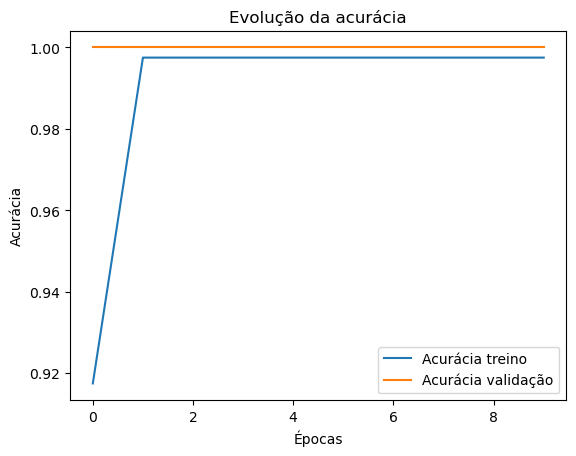

In [10]:
plt.plot(hist.history['accuracy'], label='Acurácia treino')
plt.plot(hist.history['val_accuracy'], label='Acurácia validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.title('Evolução da acurácia')
plt.show()


In [11]:
y_pred = modelo.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


## Nova Estrutura CNN

In [21]:
from tensorflow.keras.layers import Dropout, BatchNormalization


In [22]:
modelo = Sequential()

In [23]:
modelo.add(Input(shape=(IMG_SIZE, IMG_SIZE, 3)))
modelo.add(Conv2D(32, (5, 5), activation='relu', padding='same'))
modelo.add(BatchNormalization())
modelo.add(MaxPooling2D((2, 2)))
modelo.add(Dropout(0.25))


In [24]:
modelo.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
modelo.add(BatchNormalization())
modelo.add(MaxPooling2D((2, 2)))
modelo.add(Dropout(0.25))

In [25]:
modelo.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
modelo.add(BatchNormalization())
modelo.add(MaxPooling2D((2, 2)))
modelo.add(Dropout(0.25))

In [26]:
modelo.add(Flatten())
modelo.add(Dense(128, activation='relu'))
modelo.add(Dropout(0.5))

In [27]:
modelo.add(Dense(y_categ.shape[1], activation='softmax'))

In [28]:
modelo.compile(optimizer='adam', 
               loss='categorical_crossentropy', 
               metrics=['accuracy'])

In [29]:
hist = modelo.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 17s 993ms/step - accuracy: 0.8752 - loss: 0.7375 - val_accuracy: 1.0000 - val_loss: 1.1803e-09
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 911ms/step - accuracy: 0.9864 - loss: 1.1106 - val_accuracy: 0.0099 - val_loss: 23.3510
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 901ms/step - accuracy: 0.9996 - loss: 0.1024 - val_accuracy: 0.0000e+00 - val_loss: 46.2612
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 899ms/step - accuracy: 0.9974 - loss: 0.2288 - val_accuracy: 0.3465 - val_loss: 17.8217
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 897ms/step - accuracy: 0.9939 - loss: 0.0663 - val_accuracy: 0.2376 - val_loss: 23.3420
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 904ms/step - accuracy: 0.9959 - loss: 0.0238 - val_accuracy: 0.0693 - val_loss: 39.2288
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 894ms/step - accuracy: 0.9995 - loss: 0.0049 - val_accuracy: 0.0396 - val_loss: 49.4350
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 901ms/step - accuracy: 0.9985 - loss: 0.0

## Aprimoramento do Dados


In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Criação do gerador de dados com aumento

In [31]:
data_gen = ImageDataGenerator(
    rotation_range=20,      # Rotação de até 20 graus
    width_shift_range=0.1,  # Deslocamento horizontal
    height_shift_range=0.1, # Deslocamento vertical
    shear_range=0.1,        # Distorção
    zoom_range=0.1,         # Zoom
    horizontal_flip=True,   # Espelhamento horizontal
    fill_mode='nearest'     # Preenchimento dos pixels após transformação
)


In [32]:
train_data_gen = data_gen.flow(X_train, y_train, batch_size=32)

## Balanceamento de Classes

In [33]:
unique, counts = np.unique(y_encoded, return_counts=True)
print("Distribuição das classes antes do balanceamento:")
print(dict(zip(unique, counts)))

Distribuição das classes antes do balanceamento:
{0: 500, 1: 1}


In [34]:
# Calculando pesos para balancear as classes
class_weights = {i: max(counts) / count for i, count in enumerate(counts)}
print("\nPesos para balanceamento:")
print(class_weights)


Pesos para balanceamento:
{0: 1.0, 1: 500.0}


In [35]:
hist = modelo.fit(
    train_data_gen,
    epochs=20,
    validation_data=(X_test, y_test),
    class_weight=class_weights
)


/home/gustavson-barros/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.9467 - loss: 8.1945 - val_accuracy: 1.0000 - val_loss: 4.8392e-08
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 947ms/step - accuracy: 0.9944 - loss: 92.2521 - val_accuracy: 0.9901 - val_loss: 0.0220
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 930ms/step - accuracy: 0.9737 - loss: 22.5768 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 933ms/step - accuracy: 0.9628 - loss: 4.4345 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 948ms/step - accuracy: 0.9734 - loss: 275.4197 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 936ms/step - accuracy: 0.9588 - loss: 251.9799 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 968ms/step - accuracy: 0.9719 - loss: 500.4285 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 950ms/step - accuracy: 0.9

## Matriz de Confusão

In [58]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

In [59]:
y_pred = modelo.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step 


In [60]:
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
conf_matrix = confusion_matrix(y_true, y_pred_classes, labels=labels)


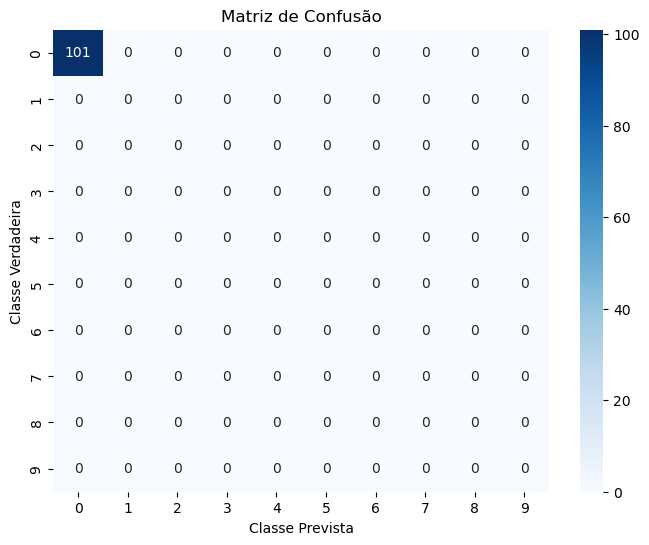

In [61]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão")
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Verdadeira")
plt.show()


In [62]:
all_classes = sorted(set(y_true).union(set(y_pred_classes)))

print("Relatório de Classificação:")
print(classification_report(y_true, y_pred_classes, labels=all_classes, target_names=le.classes_))



Relatório de Classificação:
              precision    recall  f1-score   support

         bkl       1.00      1.00      1.00       101

    accuracy                           1.00       101
   macro avg       1.00      1.00      1.00       101
weighted avg       1.00      1.00      1.00       101



/home/gustavson-barros/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2687: UserWarning: labels size, 1, does not match size of target_names, 2
  warnings.warn(


## Melhoria da Arquitetura da CNN:

    Adicionar mais camadas convolucionais e de pooling.

    Utilizar técnicas como Dropout para evitar overfitting.

Aprimoramento dos Dados:

    Aumentar a quantidade de dados (Data Augmentation) para melhorar a generalização.

    Balancear as classes para evitar viés no modelo.

Avaliação do Modelo:

    Implementar uma matriz de confusão para visualizar a precisão por classe.

    Calcular métricas como precisão, recall e F1-score.

Salvamento e Carregamento do Modelo:

    Implementar um recurso para salvar o modelo treinado.

    Adicionar uma função para carregar e usar o modelo salvo para novas previsões.

Interface Gráfica:

    Desenvolver uma interface simples para carregar uma imagem e obter a previsão.

Relatórios e Visualizações:

    Criar gráficos mais detalhados, como a evolução da perda durante o treinamento.

    Visualizar algumas previsões com as imagens correspondentes.